<a href="https://colab.research.google.com/github/swapnildeshmukh012/DataScience/blob/master/CarsMilage_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Inital few steps is for interacting with Kaggle dataset from Google colab
#if not create a folder
!mkdir .kaggle
!ls -a

mkdir: cannot create directory ‘.kaggle’: File exists
.		     .config
..		     data-cleaning-challenge-handling-missing-values.ipynb
auto-mpg.csv	     .kaggle
autompg-dataset.zip  sample_data
clen_processedData


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Add ur profile key and username to connect with Colab
import json
token = {"username":"<UserName>","key":"<KEY>"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
#Additional settings
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!kaggle datasets download -d uciml/autompg-dataset

autompg-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import pandas as pd

In [0]:
#Unzip the zip file
!unzip \autompg-dataset.zip

Archive:  autompg-dataset.zip
replace auto-mpg.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: auto-mpg.csv            


In [0]:
#DataSet has been downloaded from KAGGLE
ls -a

./                   .config/
../                  data-cleaning-challenge-handling-missing-values.ipynb
auto-mpg.csv         .kaggle/
autompg-dataset.zip  sample_data/
clen_processedData


In [0]:
auto = pd.read_csv("auto-mpg.csv")
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
#Check for datatypes and null values
auto.info()
#Observation - horsepower datatype is object need to dive deeper

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [0]:
import numpy as np
auto.horsepower.unique()
#Here hp has ? in the fields, we need to replace them

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [0]:
#Lets conver the unwanted symbol to nan
auto = auto.replace('?',np.nan)
auto.isna().sum()
#6 hp has missing values
#Need to conver hp to integer

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [0]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
#Lets fill the na's with mean value
auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].mean())

In [0]:
#Lets check the model year, Here for predicting milage model age will be needed than model year.
#Lets create a new feature
auto['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [0]:
import datetime
auto['model year'] = auto['model year']+1900 # To conver this to YYYY

In [0]:
auto.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,1970,1,chevrolet chevelle malibu


In [0]:
auto['Age'] = (datetime.datetime.now().year)-auto['model year']
auto.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Age
0,18.0,8,307.0,130.0,3504,12.0,1970,1,chevrolet chevelle malibu,49


In [0]:
#Lets drop model 
auto.drop(['model year'],axis=1,inplace=True)

In [0]:
auto['car name'].unique()
#Car name also wont determine the milage we can drop it as well

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [0]:
auto.drop(['car name'],axis=1, inplace=True)

In [0]:
#At this point datacleaning is completed lets visualize the data now with MATPLOTLIB

In [0]:
#Datanow looks clean, lets perform some visualization
import matplotlib.pyplot as plt

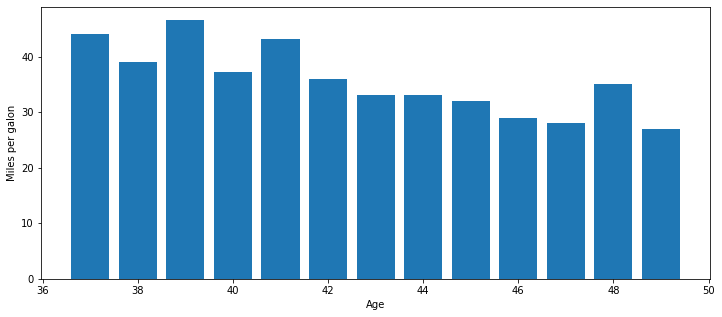

In [0]:
plt.figure(figsize=(12,5))

plt.bar(auto['Age'],auto['mpg'])

plt.xlabel("Age")
plt.ylabel("Miles per galon")
plt.show()
# As age increase the MPG decreases

Text(0, 0.5, 'Miles per galon')

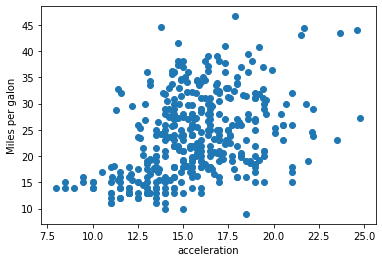

In [0]:
plt.scatter(auto['acceleration'],auto['mpg'])
plt.xlabel("acceleration")
plt.ylabel("Miles per galon")
#More the acceleration more the MPG

Text(0, 0.5, 'Miles per galon')

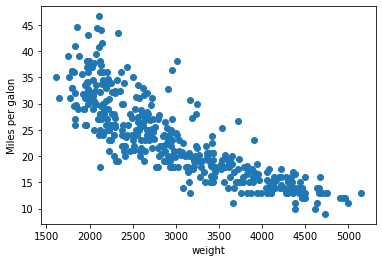

In [0]:
plt.scatter(auto['weight'],auto['mpg'])
plt.xlabel("weight")
plt.ylabel("Miles per galon")
# As weight increases milage decreases

Text(0, 0.5, 'Miles per galon')

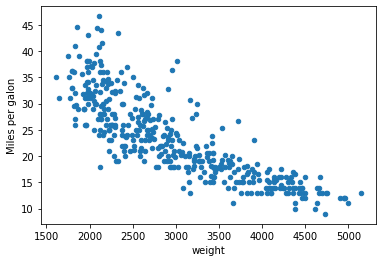

In [0]:

auto.plot.scatter(x='weight',y='mpg')
plt.xlabel("weight")
plt.ylabel("Miles per galon")

Text(0, 0.5, 'Miles per galon')

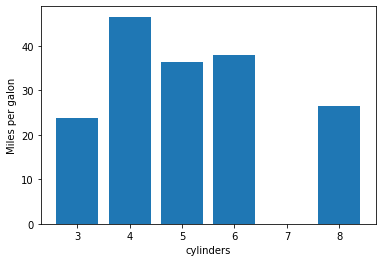

In [0]:
plt.bar(auto['cylinders'],auto['mpg'])
plt.xlabel("cylinders")
plt.ylabel("Miles per galon")
#Not relation, can be droped

In [0]:
auto.drop(['cylinders','origin'],inplace=True, axis=1)

In [0]:
auto.head()

,mpg,displacement,horsepower,weight,acceleration,Age
0,18.0,307.0,130.0,3504,12.0,49
1,15.0,350.0,165.0,3693,11.5,49
2,18.0,318.0,150.0,3436,11.0,49
3,16.0,304.0,150.0,3433,12.0,49
4,17.0,302.0,140.0,3449,10.5,49


In [0]:
#Lets check the corelation
autocorr = auto.corr()
autocorr

,mpg,displacement,horsepower,weight,acceleration,Age
mpg,1.000000,-0.804203,-0.771437,-0.831741,0.420289,-0.579267
displacement,-0.804203,1.000000,0.893646,0.932824,-0.543684,0.370164
horsepower,-0.771437,0.893646,1.000000,0.860574,-0.684259,0.411651
weight,-0.831741,0.932824,0.860574,1.000000,-0.417457,0.306564
acceleration,0.420289,-0.543684,-0.684259,-0.417457,1.000000,-0.288137
Age,-0.579267,0.370164,0.411651,0.306564,-0.288137,1.000000


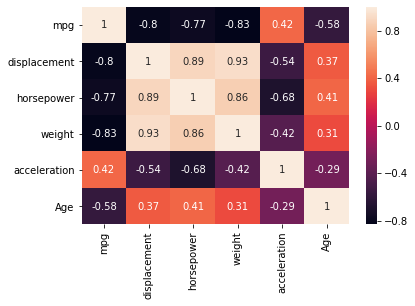

In [0]:
# Lets plot this with heat map
import seaborn as sns
sns.heatmap(autocorr,annot=True)

In [0]:
#Lets apply the ML model
auto.shape

(398, 6)

In [0]:
X = auto.drop('mpg',axis=1)
Y = auto['mpg']

In [0]:
#Lets apply simple linear regression to predict the age.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [0]:
print("Trainign score: ",linear_model.score(x_train,y_train))

Trainign score:  0.794575505347957


In [0]:
y_pred = linear_model.predict(x_test)

In [0]:
from sklearn.metrics import r2_score

In [0]:
print("test score : ", r2_score(y_test, y_pred))

test score :  0.8646970439209933
